In [1]:
from river import datasets
from river import tree
from river import metrics
from river import evaluate, stream
import kagglehub
import os
from river import feature_selection
from river import preprocessing
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import random
from river import forest
from river import ensemble
from river import linear_model
from river import feature_selection

In [2]:
random.seed(42)

In [3]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame    # DataFrame con todas las columnas
print(df.shape)
print(df.head())

(20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [4]:
df.shape

(20640, 9)

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


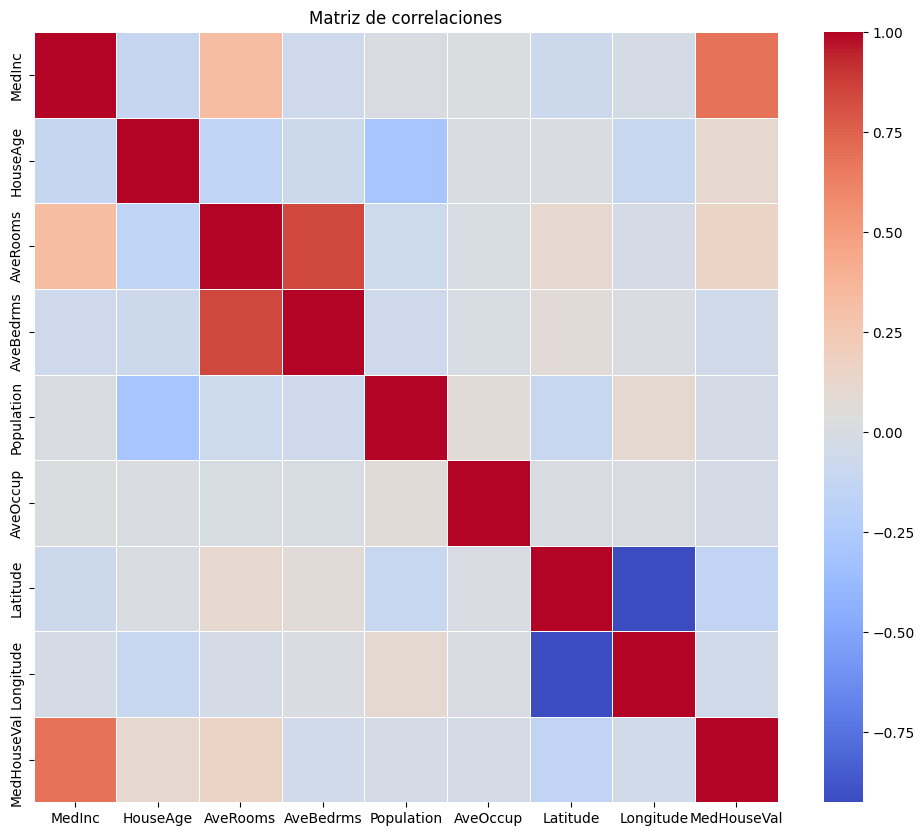

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=.5)
plt.title("Matriz de correlaciones")
plt.show()

In [7]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Vemos que hay algo de correlación, no obstante, al tratarse de flujos de datos, no podemos hacer técnicas de selección de atributos previamente por esto.

In [8]:
data_stream = (
    (row.drop("MedHouseVal"), row["MedHouseVal"])
    for _, row in df.iterrows() 
)

In [9]:
metric1 = metrics.R2()
metric2 = metrics.MAE()

In [10]:
model = preprocessing.StandardScaler() | forest.OXTRegressor(n_models=5, seed=42)

In [11]:
from river import stats
selector = feature_selection.PoissonInclusion(p=0.4, seed=42)

In [12]:
cont = 0
for x,y in data_stream:
    #selector.learn_one(x, y)
    x1 = selector.transform_one(x)
    cont+=1
    y_pred = model.predict_one(x1)
    metric1.update(y,y_pred)
    metric2.update(y,y_pred)
    model.learn_one(x1,y)
    if cont % 500 == 0:
        print("M1", metric1)
        print("M2", metric2)

print("R2 final", metric1)
print("MAE final", metric2)

M1 R2: 0.267527
M2 MAE: 0.600613
M1 R2: 0.34161
M2 MAE: 0.512625
M1 R2: 0.424672
M2 MAE: 0.473341
M1 R2: 0.508455
M2 MAE: 0.487125
M1 R2: 0.588298
M2 MAE: 0.445192
M1 R2: 0.634312
M2 MAE: 0.402164
M1 R2: 0.63834
M2 MAE: 0.388424
M1 R2: 0.666221
M2 MAE: 0.384079
M1 R2: 0.69777
M2 MAE: 0.401341
M1 R2: 0.683294
M2 MAE: 0.41558
M1 R2: 0.713293
M2 MAE: 0.425035
M1 R2: 0.713345
M2 MAE: 0.429639
M1 R2: 0.706364
M2 MAE: 0.428985
M1 R2: 0.710613
M2 MAE: 0.428416
M1 R2: 0.709698
M2 MAE: 0.415039
M1 R2: 0.706755
M2 MAE: 0.407334
M1 R2: 0.698259
M2 MAE: 0.40705
M1 R2: 0.714291
M2 MAE: 0.423222
M1 R2: 0.706784
M2 MAE: 0.435844
M1 R2: 0.697142
M2 MAE: 0.440656
M1 R2: 0.693145
M2 MAE: 0.441522
M1 R2: 0.683828
M2 MAE: 0.45219
M1 R2: 0.682442
M2 MAE: 0.446274
M1 R2: 0.676776
M2 MAE: 0.448892
M1 R2: 0.675493
M2 MAE: 0.446431
M1 R2: 0.68014
M2 MAE: 0.440065
M1 R2: 0.678202
M2 MAE: 0.436014
M1 R2: 0.684425
M2 MAE: 0.429272
M1 R2: 0.682429
M2 MAE: 0.43123
M1 R2: 0.67675
M2 MAE: 0.431772
M1 R2: 0.671717
M2 

In [20]:
data_stream = (
    (row.drop("MedHouseVal"), row["MedHouseVal"])
    for _, row in df.iterrows() 
)
metric1 = metrics.R2()
metric2 = metrics.MAE()
model = preprocessing.StandardScaler() | ensemble.BaggingRegressor(
    model=tree.HoeffdingAdaptiveTreeRegressor(grace_period=40, model_selector_decay=0.6,seed=42),
    n_models=4,
    seed=42
)
selector = feature_selection.PoissonInclusion(p=0.4, seed=42)

cont = 0
for x,y in data_stream:
    #selector.learn_one(x, y)
    x1 = selector.transform_one(x)
    cont+=1
    y_pred = model.predict_one(x1)
    metric1.update(y,y_pred)
    metric2.update(y,y_pred)
    model.learn_one(x1,y)
    if cont % 500 == 0:
        print("M1", metric1)
        print("M2", metric2)

print("R2 final", metric1)
print("MAE final", metric2)

M1 R2: 0.545666
M2 MAE: 0.425203
M1 R2: 0.592015
M2 MAE: 0.37288
M1 R2: 0.608002
M2 MAE: 0.376482
M1 R2: 0.620254
M2 MAE: 0.397364
M1 R2: 0.666302
M2 MAE: 0.379064
M1 R2: 0.701052
M2 MAE: 0.35042
M1 R2: 0.70415
M2 MAE: 0.342387
M1 R2: 0.725644
M2 MAE: 0.338386
M1 R2: 0.754647
M2 MAE: 0.351918
M1 R2: 0.738301
M2 MAE: 0.367128
M1 R2: 0.770653
M2 MAE: 0.372108
M1 R2: 0.770302
M2 MAE: 0.375465
M1 R2: 0.770073
M2 MAE: 0.369005
M1 R2: 0.772071
M2 MAE: 0.369666
M1 R2: 0.771577
M2 MAE: 0.357295
M1 R2: 0.771551
M2 MAE: 0.347696
M1 R2: 0.764145
M2 MAE: 0.347396
M1 R2: 0.782664
M2 MAE: 0.357461
M1 R2: 0.779775
M2 MAE: 0.366316
M1 R2: 0.776775
M2 MAE: 0.3668
M1 R2: 0.772272
M2 MAE: 0.36882
M1 R2: 0.767646
M2 MAE: 0.377572
M1 R2: 0.766526
M2 MAE: 0.373598
M1 R2: 0.762397
M2 MAE: 0.375573
M1 R2: 0.759086
M2 MAE: 0.375924
M1 R2: 0.762174
M2 MAE: 0.371923
M1 R2: 0.760269
M2 MAE: 0.369377
M1 R2: 0.763435
M2 MAE: 0.365458
M1 R2: 0.761043
M2 MAE: 0.367118
M1 R2: 0.757909
M2 MAE: 0.366279
M1 R2: 0.754069


In [22]:
data_stream = (
    (row.drop("MedHouseVal"), row["MedHouseVal"])
    for _, row in df.iterrows() 
)
metric1 = metrics.R2()
metric2 = metrics.MAE()
model = preprocessing.StandardScaler() | ensemble.BaggingRegressor(
    model=tree.HoeffdingAdaptiveTreeRegressor(grace_period=40, model_selector_decay=0.6,seed=42),
    n_models=5,
    seed=42
)
selector = feature_selection.PoissonInclusion(p=0.4, seed=42)

cont = 0
for x,y in data_stream:
    #selector.learn_one(x, y)
    x1 = selector.transform_one(x)
    cont+=1
    y_pred = model.predict_one(x1)
    metric1.update(y,y_pred)
    metric2.update(y,y_pred)
    model.learn_one(x1,y)
    if cont % 500 == 0:
        print("M1", metric1)
        print("M2", metric2)

print("R2 final", metric1)
print("MAE final", metric2)

M1 R2: 0.504865
M2 MAE: 0.437969
M1 R2: 0.551949
M2 MAE: 0.386277
M1 R2: 0.562287
M2 MAE: 0.402382
M1 R2: 0.614131
M2 MAE: 0.416009
M1 R2: 0.661222
M2 MAE: 0.396922
M1 R2: 0.694615
M2 MAE: 0.367051
M1 R2: 0.700377
M2 MAE: 0.351574
M1 R2: 0.720902
M2 MAE: 0.346491
M1 R2: 0.755088
M2 MAE: 0.356845
M1 R2: 0.741677
M2 MAE: 0.370636
M1 R2: 0.779945
M2 MAE: 0.369766
M1 R2: 0.778666
M2 MAE: 0.373503
M1 R2: 0.775738
M2 MAE: 0.370372
M1 R2: 0.77713
M2 MAE: 0.371517
M1 R2: 0.776755
M2 MAE: 0.358723
M1 R2: 0.777052
M2 MAE: 0.348674
M1 R2: 0.770269
M2 MAE: 0.348147
M1 R2: 0.789753
M2 MAE: 0.357015
M1 R2: 0.783789
M2 MAE: 0.368901
M1 R2: 0.780366
M2 MAE: 0.36885
M1 R2: 0.776776
M2 MAE: 0.369882
M1 R2: 0.771603
M2 MAE: 0.378268
M1 R2: 0.77051
M2 MAE: 0.374266
M1 R2: 0.767032
M2 MAE: 0.376477
M1 R2: 0.764313
M2 MAE: 0.377647
M1 R2: 0.767304
M2 MAE: 0.373715
M1 R2: 0.765348
M2 MAE: 0.370882
M1 R2: 0.768892
M2 MAE: 0.366642
M1 R2: 0.766243
M2 MAE: 0.368313
M1 R2: 0.762305
M2 MAE: 0.36864
M1 R2: 0.7585
